In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from CSV
df = pd.read_csv('name_gender_dataset.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

      Name Gender    Count  Probability
0    James      M  5304407     0.014517
1     John      M  5260831     0.014398
2   Robert      M  4970386     0.013603
3  Michael      M  4579950     0.012534
4  William      M  4226608     0.011567


In [4]:
# Summary statistics
print(df.describe())

              Count   Probability
count  1.472690e+05  1.472690e+05
mean   2.481161e+03  6.790295e-06
std    4.645472e+04  1.271345e-04
min    1.000000e+00  2.736740e-09
25%    5.000000e+00  1.368370e-08
50%    1.700000e+01  4.652460e-08
75%    1.320000e+02  3.612500e-07
max    5.304407e+06  1.451679e-02


In [5]:
# Check the data types of each column
print(df.dtypes)

Name            object
Gender          object
Count            int64
Probability    float64
dtype: object


In [6]:
# Count the number of unique names
unique_names = df['Name'].nunique()
print(f"Number of unique names: {unique_names}")

Number of unique names: 133910


In [7]:
# Count the number of occurrences for each gender
gender_counts = df['Gender'].value_counts()
print(f"Gender counts:\n{gender_counts}")

Gender counts:
F    89749
M    57520
Name: Gender, dtype: int64


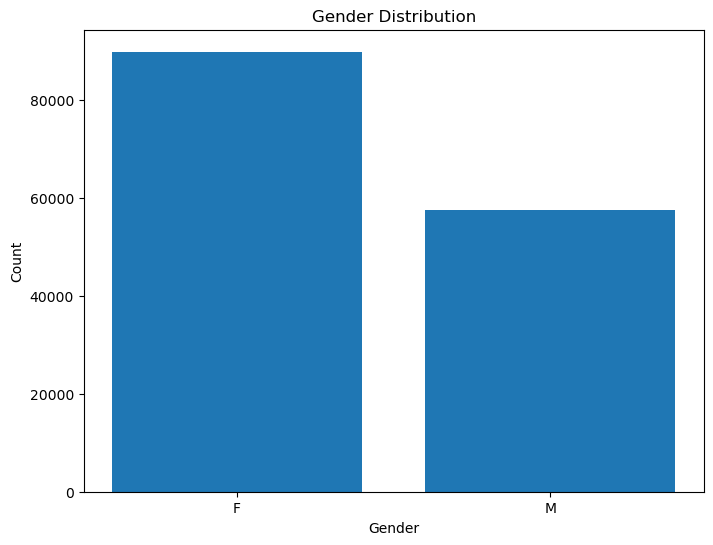

In [8]:
# Plot a bar chart for gender distribution
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

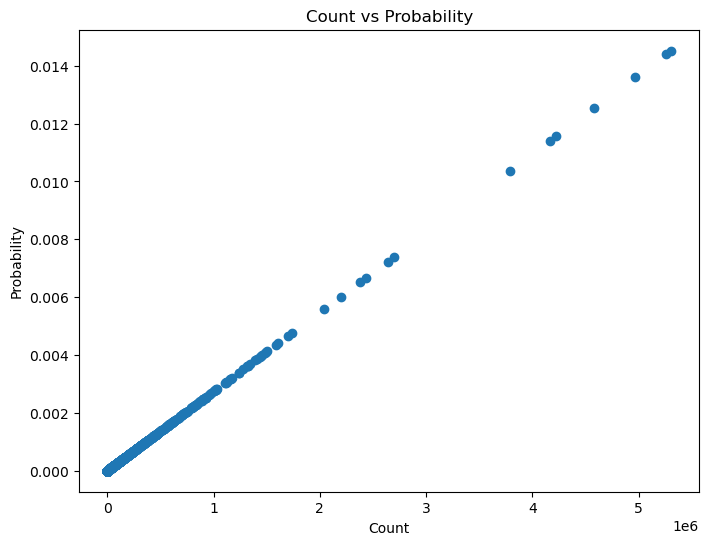

In [9]:
# Explore the relationship between count and probability
plt.figure(figsize=(8, 6))
plt.scatter(df['Count'], df['Probability'])
plt.xlabel('Count')
plt.ylabel('Probability')
plt.title('Count vs Probability')
plt.show()

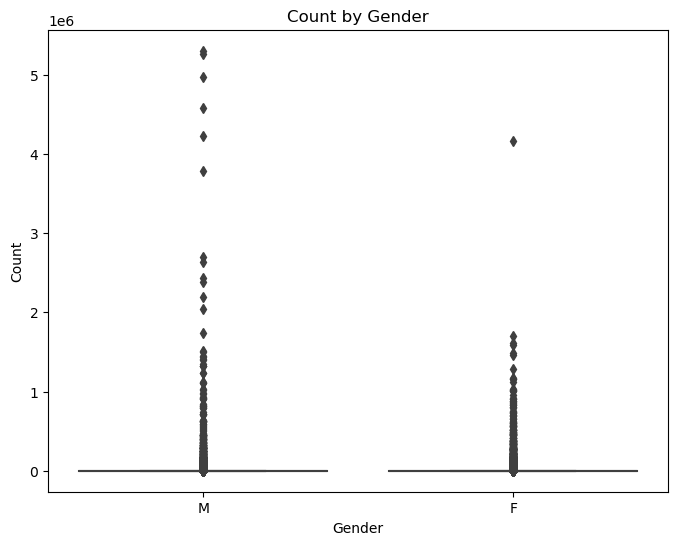

In [10]:
# Box plot of count by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender')
plt.show()

In [11]:
# Separate features (X) and target variable (y)
X = df[['Name', 'Count', 'Probability']]
y = df['Gender']

In [12]:
# Perform data preprocessing
# Apply feature hashing to convert categorical variable 'Name'
hasher = FeatureHasher(n_features=1000, input_type='string')
X_hashed = hasher.transform(X['Name'])

In [13]:
# Convert hashed features to a DataFrame
X_hashed_df = pd.DataFrame(X_hashed.toarray())

In [14]:
# Combine hashed features with other numerical features
X_encoded = pd.concat([X_hashed_df, X[['Count', 'Probability']]], axis=1)

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [16]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Perform feature selection using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [18]:
# Create the datasets for classification and clustering
classification_data = X_train_pca  # Use PCA-transformed data for classification

In [19]:
# Load the preprocessed dataset
X = classification_data  # Data for classification
y = y_train  # Target variable for classification

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred_logreg = lr_model.predict(X_test)

In [23]:
# Calculate performance metrics for Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, pos_label='M')
recall_logreg = recall_score(y_test, y_pred_logreg, pos_label='M')
f1_score_logreg = f1_score(y_test, y_pred_logreg, pos_label='M')

In [24]:
accuracy_logreg

0.6045070661630523

In [25]:
# Generate confusion matrix for Logistic Regression
confusion_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

In [26]:
# Train Artificial Neural Network (ANN) model
ann = MLPClassifier(hidden_layer_sizes=(64,32,16), max_iter=1000, random_state=42)
ann.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=1000, random_state=42)

In [27]:
# Predict using ANN model
y_pred_ann = ann.predict(X_test)

In [28]:
# Calculate performance metrics for ANN
accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann, pos_label='M')
recall_ann = recall_score(y_test, y_pred_ann, pos_label='M')
f1_score_ann = f1_score(y_test, y_pred_ann, pos_label='M')

In [29]:
# Generate confusion matrix for ANN
confusion_matrix_ann = confusion_matrix(y_test, y_pred_ann)

In [30]:
# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred_nb = nb_model.predict(X_test)

In [32]:
# Calculate performance metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label='M')
recall_nb = recall_score(y_test, y_pred_nb, pos_label='M')
f1_score_nb = f1_score(y_test, y_pred_nb, pos_label='M')

In [33]:
# Generate confusion matrix for ANN
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

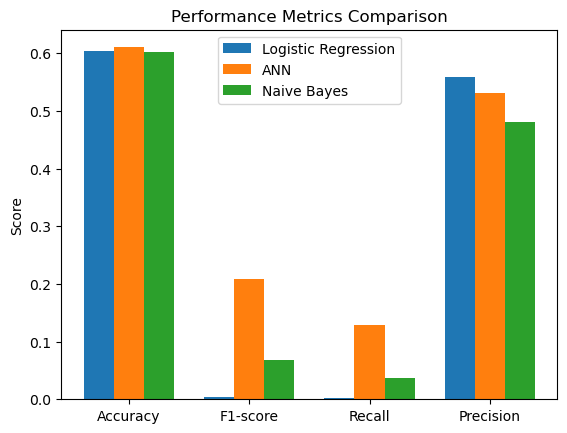

In [34]:
# Define the metrics and their corresponding values
metrics = ['Accuracy', 'F1-score', 'Recall', 'Precision']
logistic_regression_scores = [accuracy_logreg, f1_score_logreg, recall_logreg, precision_logreg]
ann_scores = [accuracy_ann, f1_score_ann, recall_ann, precision_ann]
naive_bayes_scores = [accuracy_nb, f1_score_nb, recall_nb, precision_nb]

# Plotting the bar plots
x = range(len(metrics))
width = 0.25

fig, ax = plt.subplots()
rects1 = ax.bar(x, logistic_regression_scores, width, label='Logistic Regression')
rects2 = ax.bar([i + width for i in x], ann_scores, width, label='ANN')
rects3 = ax.bar([i + 2 * width for i in x], naive_bayes_scores, width, label='Naive Bayes')

ax.set_ylabel('Score')
ax.set_title('Performance Metrics Comparison')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(metrics)
ax.legend()

plt.show()